# Metrics


## Regression

### 二乗誤差

誤差を二乗するので、絶対誤差に比べて大きく予測を外した値が強調されるのが特徴。

#### MSE (Mean Squared Error)

平均二乗誤差。

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

#### RMSE (Root Mean Squared Error)

MSEの平方根。元の単位に戻るため比較的解釈しやすい。

$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$


### 絶対誤差

二乗しないため外れ値に強い。  
また、ビジネスサイドへの説明も行いやすい。（RMSEは「誤差を二乗して平方根をとったもので⋯」とか説明しても計算が複雑でわかりにくい）

#### MAE (Mean Absolute Error)

平均絶対誤差。誤差の絶対値の平均。

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|
$$


### 誤差率

誤差と真値の比率に基づく指標。これも説明性は高い

（0除算に注意が必要）

#### MAPE (Mean Absolute Percentage Error)

平均絶対誤差率。

$$
\text{MAPE} = \frac{1}{n}\sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$




### 相関

#### 相関係数

予測値と実測値の相関

$$
R = \operatorname{Corr}(y, \hat{y})
$$

#### 決定係数

決定係数。モデルがどれだけ分散を説明できるか。

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

### RMSEとMAE

どっちがいいか？という議論があるらしい

[Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. Geoscientific model development, 7(3), 1247-1250.](https://gmd.copernicus.org/articles/7/1247/2014/gmd-7-1247-2014.pdf)

## 確率予測

### Log Loss（Cross Entropy Loss）

予測確率の信頼度を含めた誤差指標。確率出力モデルに適する。  

$$
\text{LogLoss} = -\frac{1}{n}\sum_{i=1}^n [y_i\log \hat{p}_i + (1-y_i)\log(1-\hat{p}_i)]
$$


### Calibration Plot

横軸に予測確率、縦軸には経験確率、つまり「同じくらいの予測確率になったサンプルを集めたときの実際の正例の比率」を出したもの。

（参考：[1.16. Probability calibration — scikit-learn 1.7.2 documentation](https://scikit-learn.org/stable/modules/calibration.html#calibration-curves)）

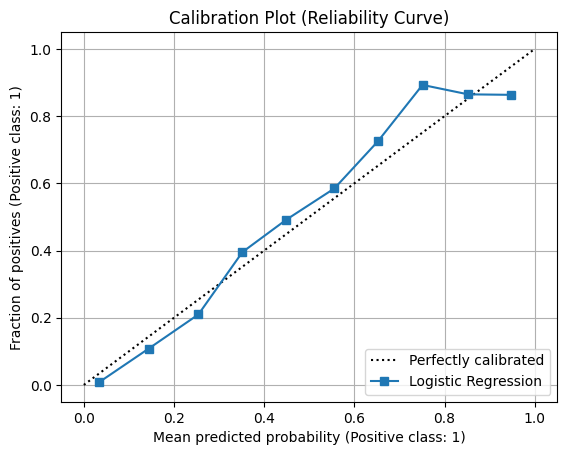

In [73]:
# データ生成
from sklearn.datasets import make_classification
size = 1000
args = dict(n_samples=size, n_features=2, n_informative=1, n_redundant=1, class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)
X_train, y_train = make_classification(**args)
X_test, y_test = make_classification(**args)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

# キャリブレーションプロット
disp = CalibrationDisplay.from_predictions(
    y_true=y_test,
    y_prob=y_prob,
    n_bins=10,          # 分割数（デフォルト10）
    strategy="uniform", # ビンの区切り方（uniform または quantile）
    name="Logistic Regression"
)

plt.title("Calibration Plot (Reliability Curve)")
plt.grid(True)
plt.show()


## 二値分類 （Binary Classification）

### 特定の閾値の下での評価

予測値の確率・信頼度を特定の閾値で区切ってPositive/Negativeを出した下での評価指標


#### 混同行列（Confusion Matrix）

True Positive (TP) と True Negative (TN) に分けられた数の分布を視覚的に判断する

| 実際＼予測 | Positive | Negative |
|-------------|-----------|-----------|
| **Positive** | TP（真陽性） | FN（偽陰性） |
| **Negative** | FP（偽陽性） | TN（真陰性） |


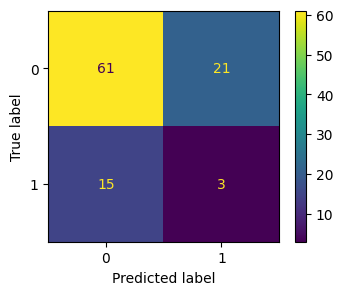

In [40]:
# create sample data
import numpy as np
size = 100
np.random.seed(42)
y_true = np.random.binomial(n=1, p=0.2, size=size)
y_pred = np.random.binomial(n=1, p=0.2, size=size)

# confusion matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)

#### Accuracy（正解率）

全体のうち、正しく分類できた割合。  

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$

### Recall（再現率）

実際に「正例（Positive）」であるもののうち、正しく予測できた割合。  
どれだけFalse Negativeを小さくできたか。

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### Precision（適合率）

「正例（Positive）」と予測したうち、実際にPositiveだった割合。  
どれだけFalse Positiveを小さくできたか

$$
\text{Precision} = \frac{TP}{TP + FP}
$$


### F1-score

PrecisionとRecallの調和平均。両者のバランスを取る指標。  
PrecisionとRecallにはトレードオフ関係がある（https://datawokagaku.com/f1score/ ）ため平均で評価している。

$$
F1 = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}}
= 2 \frac{Recall \times Precision}{Recall + Precision}
$$


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for metrics in "accuracy_score, recall_score, precision_score, f1_score".split(", "):
    value = eval(f"{metrics}(y_true, y_pred)")
    print(f"{metrics}={value:.2}")

accuracy_score=0.64
recall_score=0.17
precision_score=0.12
f1_score=0.14


### 複数の閾値のもとでの指標



#### ROC-AUC（Area Under the ROC Curve）

ROC曲線（真陽性率 vs 偽陽性率）の下の面積。  
1に近いほどモデルの識別能力が高い。


true positive rate $TPR$（recallの別名、陽性者を正しく陽性だと当てる率、sensitivityとも）とfalse positive rate $FPR$（陰性者のうち偽陽性になる率）

$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN} =
\frac{\text{Positiveを当てたもの}}{\text{Positiveのもの}}\\
FPR = \frac{FP}{N} = \frac{FP}{FN + TN} =
\frac{\text{Positiveを外したもの}}{\text{Negativeのもの}}
$$

を用いて閾値を変えながら描いた曲線をreceiver operating characteristic（ROC; 受信者操作特性）曲線という。

ROC曲線の下側の面積（Area Under the Curve）を**ROC-AUC**という。ランダムなアルゴリズム（chance level）だとROC-AUCは0.5になる

/tmp/ipykernel_57789/1909585709.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


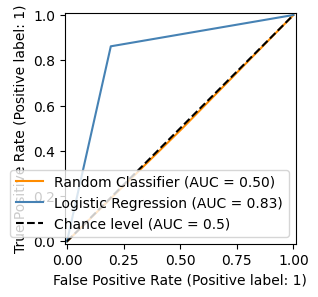

In [45]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1,
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

# ランダムなアルゴリズム
import numpy as np
np.random.seed(1)
random = np.random.binomial(n=1, p=0.5, size=size)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y,
    random,
    name="Random Classifier",
    color="darkorange",
    ax=ax
)
RocCurveDisplay.from_predictions(
    y,
    y_pred,
    name="Logistic Regression",
    color="steelblue",
    plot_chance_level=True,
    ax=ax
)
fig.show()

#### Precision-Recall Curve

さまざまなthresholdの元でのRecallとPrecisionを算出し、横軸にRecall、縦軸にPrecisionを結んだグラフ

PR曲線の下側の面積（Area Under the Curve）をPR-AUCあるいはAverage Precisionという

$$
AP = \sum^K_{k=1} (R_k - R_{k-1}) P_k
$$

ROC曲線とは異なり、「ランダムなアルゴリズムなら0.5」のような安定したスケールではなく、スケールはクラスのバランス（不均衡具合）に依存する

その分、不均衡データにおけるモデル評価に向いていると言われている


/tmp/ipykernel_57789/2352438180.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


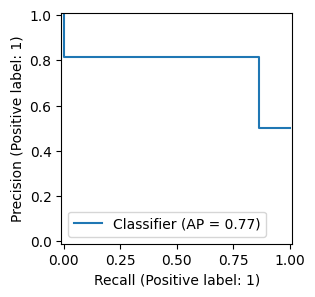

In [46]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1,
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])

from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y, y_pred, ax=ax)
fig.show()

### imbalanced dataとPR曲線・ROC曲線


ある不均衡データがあったとする

In [51]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1, weights=[0.9, 0.1],
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

import pandas as pd
pd.Series(y).value_counts()

0    894
1    106
Name: count, dtype: int64

In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for metrics in "accuracy_score, recall_score, precision_score, f1_score".split(", "):
    value = eval(f"{metrics}(y, y_pred)")
    print(f"{metrics}={value:.2}")

accuracy_score=0.9
recall_score=0.26
precision_score=0.55
f1_score=0.36


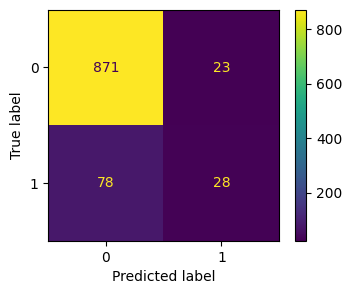

In [53]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=ax)

/tmp/ipykernel_57789/4277730166.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


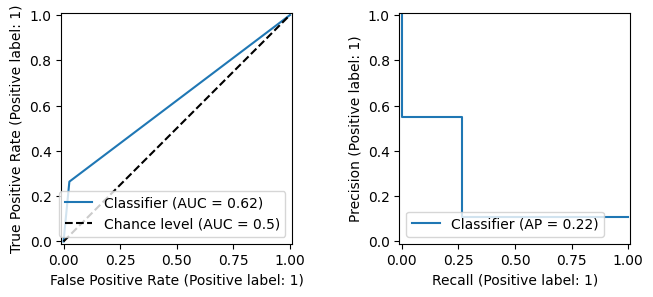

In [54]:
# plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=[8, 3], ncols=2)

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_predictions(y, y_pred, plot_chance_level=True, ax=axes[0])
PrecisionRecallDisplay.from_predictions(y, y_pred, ax=axes[1])
fig.show()

### マシューズ相関係数（MCC）

**マシューズ相関係数（Matthews Correlation Coefficient: MCC）** は二値分類モデルの性能評価指標の一つで、特にクラスの不均衡がある場合に信頼性が高いことで知られている。

$$
\mathrm{MCC}=\frac{T P \cdot T N-F P \cdot F N}{\sqrt{(T P+F P)(T P+F N)(T N+F P)(T N+F N)}}
$$


言葉でいうと

- 分子： **正しく分類された数（TP × TN）** から、 **誤分類の積（FP × FN）** を引いたもの。
- 分母：全体の規模を正規化（0除算を防ぐため）。

In [55]:
from sklearn.metrics import matthews_corrcoef

y_true = [1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 0, 1, 0, 0, 0, 0]
print(f"MCC: {matthews_corrcoef(y_true, y_pred):.3f}")

# 不均衡なデータに対してMajority Classだけを予測した場合
y_true = [1, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0]
print(f"MCC: {matthews_corrcoef(y_true, y_pred):.3f}")

MCC: 0.300
MCC: 0.000


### Balanced Accuracy

Balanced Accuracy は、各クラスの正解率（リコール、感度）を平均したもの

$$
\text { Balanced Accuracy }=\frac{1}{2}\left(\frac{T P}{T P+F N}+\frac{T N}{T N+F P}\right)
$$

ここで：

- $\frac{TP}{TP + FN}$：感度（Sensitivity）または再現率（Recall）
- $\frac{TN}{TN + FP}$：特異度（Specificity）

不均衡データに強いとされる。

In [56]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# 不均衡なデータに対してMajority Classだけを予測した場合
y_true = [1, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0]

print(f"accuracy: {accuracy_score(y_true, y_pred):.3f}")
print(f"balanced_accuracy: {balanced_accuracy_score(y_true, y_pred):.3f}")

accuracy: 0.857
balanced_accuracy: 0.500


## 多クラス分類（Multiclass Classification）

### Macro F1

各クラスのF1スコアを単純平均したもの。クラス不均衡に弱い。  
各クラスを等しく扱う。

### Micro F1

全サンプルのTP・FP・FNを合計してからF1を計算。  
サンプル数の多いクラスに影響されやすい。


### Weighted F1

各クラスのF1をクラスのサンプル数で重み付けして平均。  
クラス不均衡データに適する。


## ランキング・推薦（Ranking / Recommender）

### Precision@k

上位 $k$ 件の予測のうち、正解が占める割合。  

$$
\text{P@k} = \frac{\text{正解件数@k}}{k}
$$

### Recall@k

上位 $k$ 件が、全正解のうちどれだけをカバーしたか。  

$$
\text{R@k} = \frac{\text{正解件数@k}}{\text{全正解件数}}
$$

### MAP（Mean Average Precision）

各クエリに対する平均適合率（AP）を平均化したもの。  

$$
\text{MAP} = \frac{1}{Q}\sum_{q=1}^{Q} \frac{1}{R_q}\sum_{k=1}^{R_q} \text{Precision@k}
$$

### NDCG（Normalized Discounted Cumulative Gain）

順位の高い正解をより高く評価する。上位の重要性を考慮。  

$$
\text{NDCG@k} = \frac{\text{DCG@k}}{\text{IDCG@k}}
$$

### MRR（Mean Reciprocal Rank）

最初の正解が出現する順位の逆数を平均。  

$$
\text{MRR} = \frac{1}{Q}\sum_{i=1}^{Q} \frac{1}{\text{rank}_i}
$$

## 類似度

### コサイン類似度

ベクトルの方向が似ているものは似ている

[コサイン類似度（Cosine Similarity）とは？：AI・機械学習の用語辞典 - ＠IT](https://atmarkit.itmedia.co.jp/ait/articles/2112/08/news020.html)

2つのベクトルがなす角（コサイン）の値が類似度として使える、ということになる

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a} \cdot \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b})
\\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a} \cdot \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$



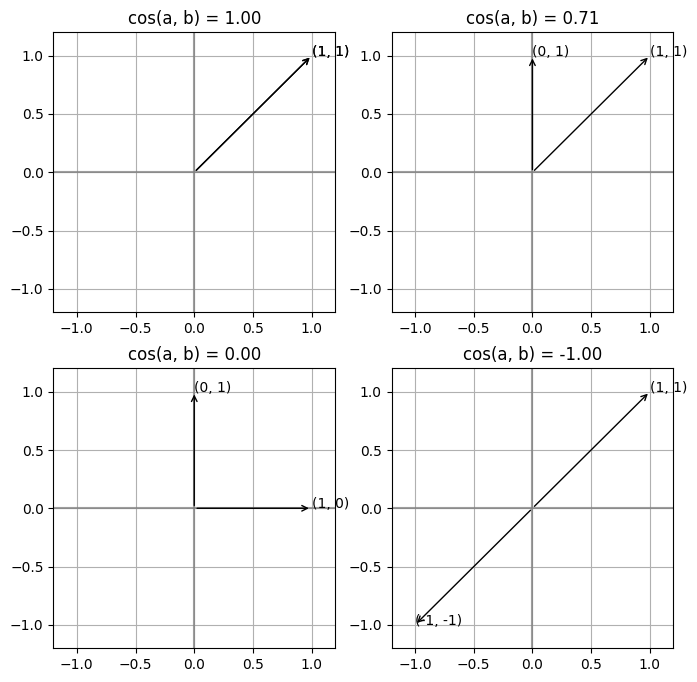

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
        ax.grid(True)
    return ax


data = [
    [
        [
            np.array([1, 1]),
            np.array([1, 1])
        ],
        [
            np.array([0, 1]),
            np.array([1, 1])
        ],
    ],
    [
        [
            np.array([1, 0]),
            np.array([0, 1])
        ],
        [
            np.array([1, 1]),
            np.array([-1, -1])
        ],
    ]
]

fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=2)
for i in range(2):
    for j in range(2):
        a, b = data[i][j]
        plot(axes[i, j], a, b)
fig.show()

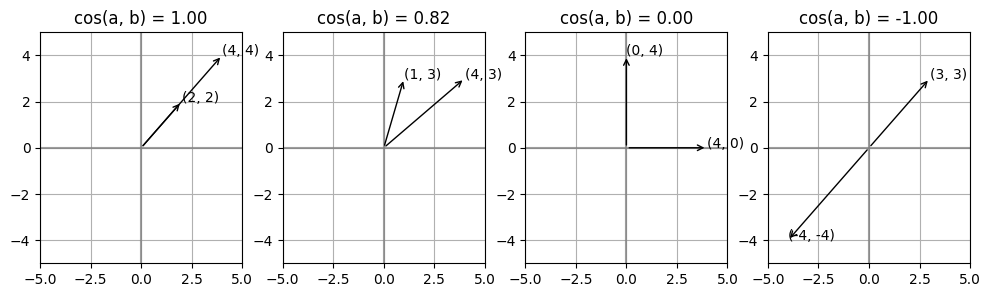

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-5, 5), ylim=(-5, 5))
        ax.grid(True)
    return ax


data = [
    [
        np.array([4, 4]),
        np.array([2, 2])
    ],
    [
        np.array([1, 3]),
        np.array([4, 3])
    ],
    [
        np.array([4, 0]),
        np.array([0, 4])
    ],
    [
        np.array([3, 3]),
        np.array([-4, -4])
    ]
]

fig, axes = plt.subplots(figsize=(12, 3), ncols=4)
for i in range(4):
    a, b = data[i]
    plot(axes[i], a, b)
fig.show()